<a href="https://colab.research.google.com/github/Sannya-Wasim/Dice_AI_Course/blob/main/Assignment_02_Task_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 02**

## Task 02

In this task, our goal is to fine-tune a pre-existing model using TensorFlow for image classification. Our dataset comprises three classes of digits: 0, 1, and 2. For this task, I chose to use the MobileNetV2 model and fine-tune it to optimize its performance on our specific dataset.

MobileNetV2 is a lightweight, efficient, and highly accurate convolutional neural network architecture. It is well-suited for mobile and edge devices due to its low computational requirements. Since our task involves digit classification and our dataset is small, MobileNetV2 provides a good balance between accuracy and efficiency.

### **Mounting Drive**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Importing Libraries**

In [4]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.resnet50 import preprocess_input


### **Data Preprocessing and Exploratory Data Analysis**

In [5]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [6]:
batch_size=32
image_height = 100
image_width = 100

In [7]:
train_data_dir = '/content/drive/MyDrive/data_assign_2/hand_written_digits'

In [8]:
# ImgaeDataGenerator for data augmentation and normalisation
datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(image_height, image_width),
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'training'
)

validation_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(image_height, image_width),
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'validation'
)

Found 3728 images belonging to 3 classes.
Found 930 images belonging to 3 classes.


In [11]:
# Display the classes and their encodings
class_labels = train_generator.class_indices
class_labels

{'0_digits': 0, '1_digits': 1, '2_digits': 2}

### **Fine Tuning MobileNet for Image Classification**

In [12]:
# Define the number of classes
num_classes = len(class_labels)

# Load the pre-trained model MobileNetV2 model(without the top classification layer)
base_model = MobileNetV2(weights='imagenet', include_top=False)

# Add a global average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a new classification layer with 3 outputs (one for each class)
predictions= Dense(num_classes, activation='softmax')(x)

# Create the fine tuned model
model = Model(inputs = base_model.input, outputs = predictions)

In [13]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, None, None, 32)       864       ['input_2[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, None, None, 32)       128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, None, None, 32)       0         ['bn_Conv1[0][0]']      

In [14]:
# Freeze the layers of the pre-trained model
for layer in base_model.layers:
  layer.trainable = False

In [15]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, None, None, 32)       864       ['input_2[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, None, None, 32)       128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, None, None, 32)       0         ['bn_Conv1[0][0]']      

In [18]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
# Train the model
model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10
)

Epoch 1/10
117/117 [==============================] - 1213s 10s/step - loss: 0.2134 - accuracy: 0.9214 - val_loss: 0.1009 - val_accuracy: 0.9602
Epoch 2/10
117/117 [==============================] - 48s 404ms/step - loss: 0.0628 - accuracy: 0.9802 - val_loss: 0.0879 - val_accuracy: 0.9720
Epoch 3/10
117/117 [==============================] - 47s 403ms/step - loss: 0.0525 - accuracy: 0.9842 - val_loss: 0.0597 - val_accuracy: 0.9785
Epoch 4/10
117/117 [==============================] - 45s 386ms/step - loss: 0.0505 - accuracy: 0.9847 - val_loss: 0.0567 - val_accuracy: 0.9806
Epoch 5/10
117/117 [==============================] - 45s 388ms/step - loss: 0.0502 - accuracy: 0.9844 - val_loss: 0.0692 - val_accuracy: 0.9763
Epoch 6/10
117/117 [==============================] - 45s 386ms/step - loss: 0.0386 - accuracy: 0.9855 - val_loss: 0.0413 - val_accuracy: 0.9817
Epoch 7/10
117/117 [==============================] - 46s 389ms/step - loss: 0.0377 - accuracy: 0.9866 - val_loss: 0.0772 - val_ac

In [20]:
model.save('Mobile-Net-Fine-Tuned.h5', save_format='h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### **Inference on Mobile Net**

In [22]:
# importing libraries
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

In [24]:
# Load the pretrained model
model = tf.keras.models.load_model('Mobile-Net-Fine-Tuned.h5')

In [36]:
# Define a function fro inference on a single image
def predict_image(image_path, model, class_labels):
  img = image.load_img(image_path, target_size=(100,100))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  img= preprocess_input(img)
  prediction = model.predict(img)
  return prediction[0]

1/1 [==============================] - 0s 34ms/step
Image : /content/drive/MyDrive/data_assign_2/hand_written_digits/0_digits/image_1645_1696577964591MNIST_IMAGE_TRAIN.jpg
Predicted Class : 0
Confidence Score : 0.9281953573226929


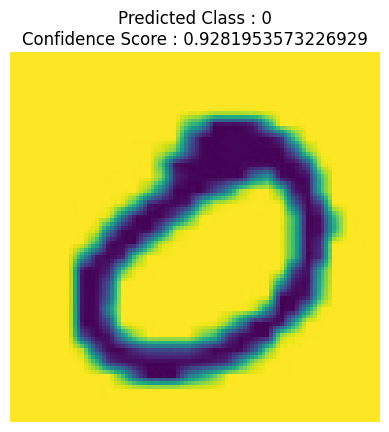

In [44]:
# Perform inference on 0 digit image
image_path = '/content/drive/MyDrive/data_assign_2/hand_written_digits/0_digits/image_1645_1696577964591MNIST_IMAGE_TRAIN.jpg'

prediction = predict_image(image_path, model, class_labels)

predicted_class = np.argmax(prediction)
confidence_score = np.max(prediction)

# Display the result
print(f"Image : {image_path}")
print(f"Predicted Class : {predicted_class}")
print(f"Confidence Score : {confidence_score}")

# Display the image
plt.imshow(plt.imread(image_path))
plt.title(f"Predicted Class : {predicted_class}\nConfidence Score : {confidence_score}")
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 34ms/step
Image : /content/drive/MyDrive/data_assign_2/hand_written_digits/1_digits/image_1240_1696577994137MNIST_IMAGE_TEST.jpg
Predicted Class : 1
Confidence Score : 0.9998100399971008


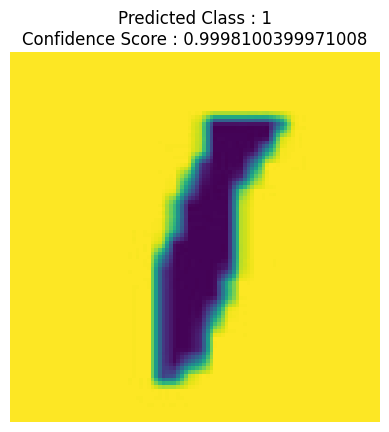

In [39]:
# Perform inference on 1 digit image
image_path = '/content/drive/MyDrive/data_assign_2/hand_written_digits/1_digits/image_1240_1696577994137MNIST_IMAGE_TEST.jpg'

prediction = predict_image(image_path, model, class_labels)

predicted_class = np.argmax(prediction)
confidence_score = np.max(prediction)

# Display the result
print(f"Image : {image_path}")
print(f"Predicted Class : {predicted_class}")
print(f"Confidence Score : {confidence_score}")

# Display the image
plt.imshow(plt.imread(image_path))
plt.title(f"Predicted Class : {predicted_class}\nConfidence Score : {confidence_score}")
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 36ms/step
Image : /content/drive/MyDrive/data_assign_2/hand_written_digits/2_digits/image_3362_1696577965279MNIST_IMAGE_TRAIN.jpg
Predicted Class : 2
Confidence Score : 0.9879354238510132


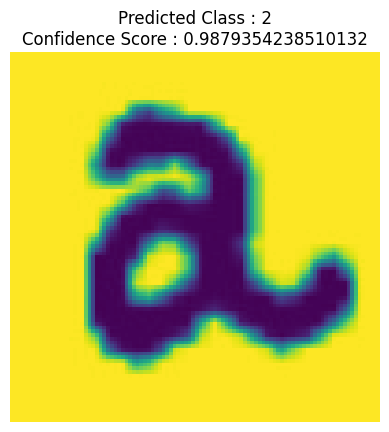

In [40]:
# Perform inference on 2 digit image
image_path = '/content/drive/MyDrive/data_assign_2/hand_written_digits/2_digits/image_3362_1696577965279MNIST_IMAGE_TRAIN.jpg'

prediction = predict_image(image_path, model, class_labels)

predicted_class = np.argmax(prediction)
confidence_score = np.max(prediction)

# Display the result
print(f"Image : {image_path}")
print(f"Predicted Class : {predicted_class}")
print(f"Confidence Score : {confidence_score}")

# Display the image
plt.imshow(plt.imread(image_path))
plt.title(f"Predicted Class : {predicted_class}\nConfidence Score : {confidence_score}")
plt.axis('off')
plt.show()